## **Iris Dataset**

In [ ]:
import pandas as pd
import numpy as np
import math
from numpy import log2 as log
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/Iris.csv")

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'] = df['Species'].replace(['Iris-setosa','Iris-virginica','Iris-versicolor'],[1,3,2])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3,stratify=y) 

In [ ]:
x_train.shape

(105, 5)

In [ ]:
x_test.shape

(45, 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()


In [ ]:
clf = clf.fit(x_train,y_train)

In [ ]:
clf = clf.fit(x_test,y_test)

In [ ]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print("Accuracy:",accuracy_score(y_test,y_test_pred))

Accuracy: 1.0


[Text(0.4, 0.8333333333333334, 'x[3] <= 2.6\ngini = 0.667\nsamples = 45\nvalue = [15, 15, 15]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [15, 0, 0]'),
 Text(0.6, 0.5, 'x[0] <= 101.0\ngini = 0.5\nsamples = 30\nvalue = [0, 15, 15]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 15\nvalue = [0, 15, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 15]')]

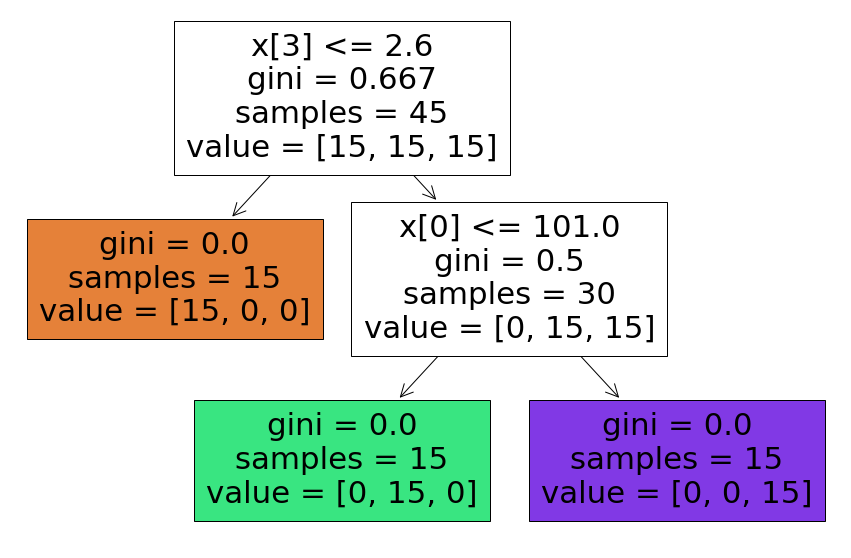

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [ ]:
maxdepth1=[]
for i in range(1,10):
  maxdepth1.append(i)

maxdepth1

[1, 2, 3, 4, 5, 6, 7, 8, 9]

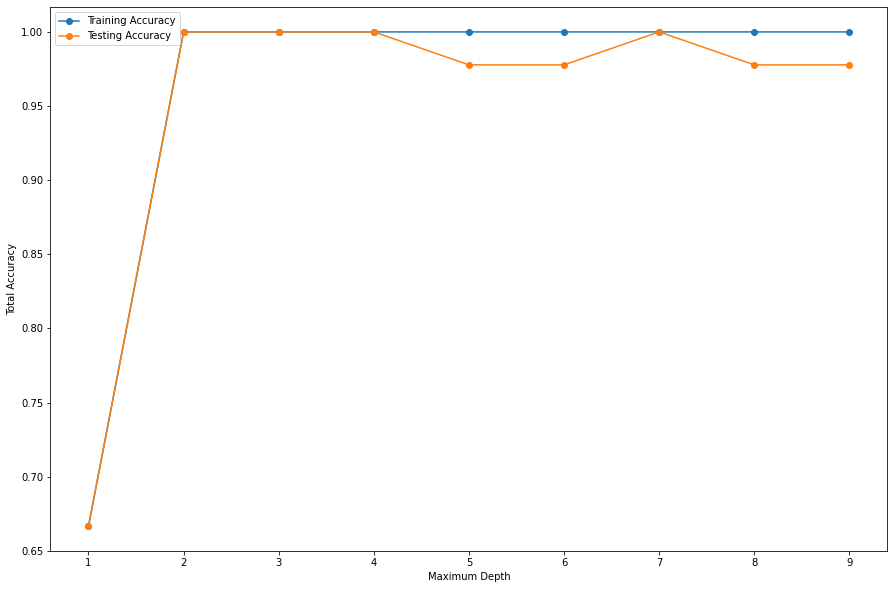

In [ ]:
train=[]
test=[]
for x in maxdepth1:
  dtc =DecisionTreeClassifier(max_depth=x)
  dtc.fit(x_train,y_train)

  y_train_pred = dtc.predict(x_train)
  train_z_prob = dtc.predict_proba(x_train)[:,1]

  y_test_pred = dtc.predict(x_test)
  test_z_prob = dtc.predict_proba(x_test)[:,1]

  train.append(accuracy_score(y_train, y_train_pred))
  test.append(accuracy_score(y_test, y_test_pred))

fig = plt.figure(figsize=(15,10))
x = np.arange(len(maxdepth1)) + 1 # 
plt.plot(x, train, label='Training Accuracy',marker="o") 
plt.plot(x, test, label='Testing Accuracy',marker="o") 
plt.xlabel('Maximum Depth') 
plt.ylabel('Total Accuracy') 
plt.legend() 
plt.show() 

## **Breast Cancer Dataset**

In [ ]:
df1 = pd.read_csv("/content/Breast_cancer_data.csv")

In [ ]:
df1

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
df1.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:, -1].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,stratify=y) 

In [ ]:
x_train.shape

(398, 5)

In [ ]:
x_test.shape

(171, 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()


In [ ]:
clf1 = clf1.fit(x_train,y_train)

In [ ]:
clf1 = clf1.fit(x_test,y_test)

In [ ]:
y_train_pred = clf1.predict(x_train)
y_test_pred = clf1.predict(x_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test,y_test_pred))

Accuracy: 1.0


[Text(0.605, 0.9375, 'x[0] <= 14.805\ngini = 0.468\nsamples = 171\nvalue = [64, 107]'),
 Text(0.41, 0.8125, 'x[4] <= 0.111\ngini = 0.193\nsamples = 111\nvalue = [12, 99]'),
 Text(0.26, 0.6875, 'x[2] <= 92.71\ngini = 0.114\nsamples = 99\nvalue = [6, 93]'),
 Text(0.16, 0.5625, 'x[1] <= 21.53\ngini = 0.064\nsamples = 91\nvalue = [3, 88]'),
 Text(0.08, 0.4375, 'x[1] <= 18.12\ngini = 0.026\nsamples = 77\nvalue = [1, 76]'),
 Text(0.04, 0.3125, 'gini = 0.0\nsamples = 55\nvalue = [0, 55]'),
 Text(0.12, 0.3125, 'x[1] <= 18.18\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.08, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16, 0.1875, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.24, 0.4375, 'x[1] <= 21.71\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.2, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.28, 0.3125, 'x[2] <= 87.46\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.24, 0.1875, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Tex

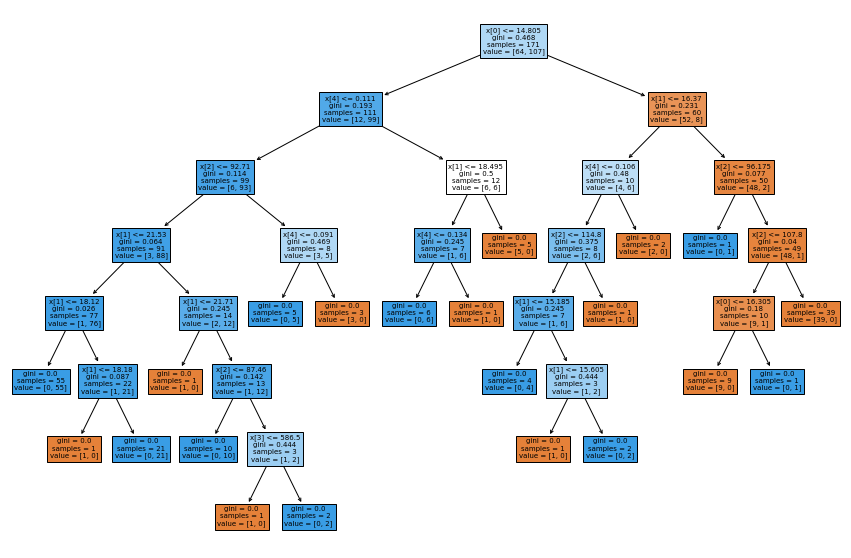

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf1,filled=True)

In [ ]:
cm=confusion_matrix(y_train,y_train_pred,labels=clf.classes_)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

ValueError: ignored

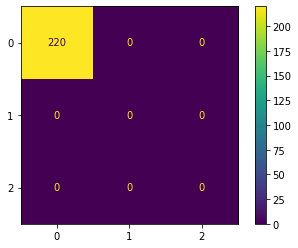

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf1.classes_)
disp.plot()
plt.show()

In [ ]:
maxdepth=[]
for i in range(1,10):
  maxdepth.append(i)

maxdepth

[1, 2, 3, 4, 5, 6, 7, 8, 9]

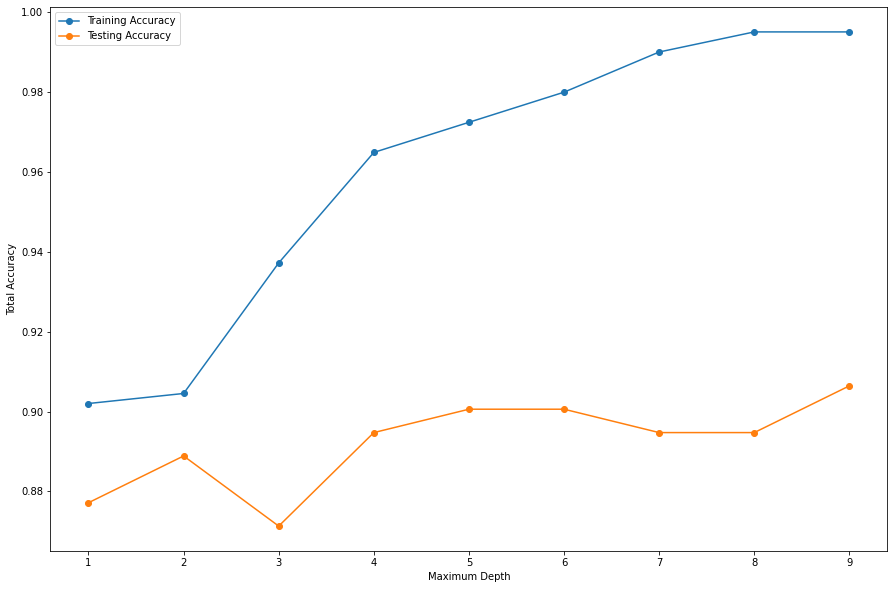

In [ ]:
train=[]
test=[]
for x in maxdepth:
  dtc =DecisionTreeClassifier(max_depth=x)
  dtc.fit(x_train,y_train)

  y_train_pred = dtc.predict(x_train)
  train_z_prob = dtc.predict_proba(x_train)[:,1]

  y_test_pred = dtc.predict(x_test)
  test_z_prob = dtc.predict_proba(x_test)[:,1]

  train.append(accuracy_score(y_train, y_train_pred))
  test.append(accuracy_score(y_test, y_test_pred))

fig = plt.figure(figsize=(15,10))
x = np.arange(len(maxdepth)) + 1 # 
plt.plot(x, train, label='Training Accuracy',marker="o") 
plt.plot(x, test, label='Testing Accuracy',marker="o") 
plt.xlabel('Maximum Depth') 
plt.ylabel('Total Accuracy') 
plt.legend() 
plt.show() 